# 1. Preparo ambiente

In [621]:
from binance.client import Client
from datetime import datetime
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps

import multiprocessing
import pandas as pd
import numpy as np

multiprocessing.set_start_method('fork', force=True)

#TODO: mover a variables de entorno
api_key = ''
secret_key = ''

client = Client(api_key, secret_key)

In [622]:
%%time
bars = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, "8 week ago UTC")

def cast_string_to_float(data):
    if type(data) == str:
        casted_data = float(data)
    else:
        casted_data = datetime.fromtimestamp(data/1000.0)
    return casted_data

# delete unwanted data - just keep date, open, high, low, close
formated_bars = []
for line in bars:
    del line[6:]
    # cast string numbers to integer
    formated_bars.append(list(map(cast_string_to_float, line)))

#  store data in a dataframe
btc_df = pd.DataFrame(formated_bars, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_df.set_index('Date', inplace=True)
# Converting the index as date
btc_df.index = pd.to_datetime(btc_df.index)
btc_df

CPU times: user 1.78 s, sys: 436 ms, total: 2.21 s
Wall time: 5min 20s


,Open,High,Low,Close,Volume
Date,,,,,
2021-05-10 21:52:00,55662.50,55823.33,55662.50,55787.22,37.218617
2021-05-10 21:53:00,55793.76,55799.35,55674.04,55680.01,37.914679
2021-05-10 21:54:00,55680.02,55680.02,55541.31,55573.01,49.851620
2021-05-10 21:55:00,55573.01,55682.37,55550.01,55578.92,43.208491
2021-05-10 21:56:00,55578.91,55608.44,55429.99,55573.62,123.227175
...,...,...,...,...,...
2021-07-05 21:52:00,34124.25,34124.26,34097.13,34105.68,15.655005
2021-07-05 21:53:00,34106.99,34111.88,34049.18,34056.93,23.543506
2021-07-05 21:54:00,34056.94,34097.88,34040.00,34051.70,27.163405


# 2. Agrego predictores

In [ ]:
from talib import *
import numpy as np



In [645]:
%%time
data = btc_df.copy()

# data['rsi_1min'] = RSI(data['Close'], timeperiod=14)
# data['rsi_1min_change_1'] = data['rsi_1min'].pct_change()
# data['rsi_5min'] = RSI(data['Close'], timeperiod=70)
# data['rsi_5min_change_1'] = data['rsi_5min'].pct_change()
# data['rsi_30min'] = RSI(data['Close'], timeperiod=420)
# data['rsi_30min_change_1'] = data['rsi_30min'].pct_change()
# data['rsi_1h'] = RSI(data['Close'], timeperiod=840)
# data['rsi_1h_change_1'] = data['rsi_1h'].pct_change()
# data['rsi_4h'] = RSI(data['Close'], timeperiod=3360)
# data['rsi_4h_change_1'] = data['rsi_4h'].pct_change()


# Percentage changes
# data['PctChange_1'] = data['Close'].pct_change()
# data['PctChange_5'] = data['Close'].pct_change(periods=5)
# data['PctChange_10'] = data['Close'].pct_change(periods=10)
# data['PctChange_12'] = data['Close'].pct_change(periods=12)
# data['PctChange_15'] = data['Close'].pct_change(periods=15)
# data['PctChange_30'] = data['Close'].pct_change(periods=30)
# data['PctChange_30'] = data['Close'].pct_change(periods=50)
# data['PctChange_60'] = data['Close'].pct_change(periods=60)
# data['PctChange_100'] = data['Close'].pct_change(periods=100)
# data['PctChange_200'] = data['Close'].pct_change(periods=200)
# data['PctChange_500'] = data['Close'].pct_change(periods=500)
# data['PctChange_900'] = data['Close'].pct_change(periods=900)
aux = pd.DataFrame()

# Simple Moving averages
# for i in range(5, 901, 5):
#     aux['Sma_'+str(i)] = data['Close'].rolling(i).mean()

# for i in range(5, 901, 5):
#     aux['Sma_'+str(i)+'_chg'] = aux['Sma_'+str(i)].pct_change()
#     aux['Sma_'+str(i)+'_trend'] = 0

# for i in range(5, 901, 5):
#     aux.loc[aux['Sma_'+str(i)+'_chg'] >= 0, 'Sma_'+str(i)+'_trend'] = 1
# for i in range(5, 901, 5):
#     data['Sma_'+str(i)+'_trend'] = aux['Sma_'+str(i)+'_trend']

# Exponential Moving averages
for i in range(5, 201, 5):
    aux['Ema_'+str(i)] = pd.Series.ewm(data['Close'], span=i).mean()

for i in range(5, 201, 5):
    aux['Ema_'+str(i)+'_chg'] = aux['Ema_'+str(i)].pct_change()
    aux['Ema_'+str(i)+'_trend'] = 0

for i in range(5, 201, 5):
    aux.loc[aux['Ema_'+str(i)+'_chg'] >= 0, 'Ema_'+str(i)+'_trend'] = 1
for i in range(5, 201, 5):
    #data['Ema_'+str(i)+'_trend'] = aux['Ema_'+str(i)+'_trend']
    data['Ema_'+str(i)+'_chg'] = aux['Ema_'+str(i)+'_chg']



# data['Sma_5_chg'] = data['Sma_5'].pct_change()
# data['Sma_10_chg'] = data['Sma_10'].pct_change()
# data['Sma_15_chg'] = data['Sma_15'].pct_change()
# data['Sma_20_chg'] = data['Sma_20'].pct_change()
# data['Sma_25_chg'] = data['Sma_25'].pct_change()
# data['Sma_30_chg'] = data['Sma_30'].pct_change()
# data['Sma_35_chg'] = data['Sma_35'].pct_change()
# data['Sma_40_chg'] = data['Sma_40'].pct_change()
# data['Sma_45_chg'] = data['Sma_45'].pct_change()
# data['Sma_50_chg'] = data['Sma_50'].pct_change()
# data['Sma_55_chg'] = data['Sma_55'].pct_change()
# data['Sma_60_chg'] = data['Sma_60'].pct_change()
# data['Sma_65_chg'] = data['Sma_65'].pct_change()
# data['Sma_70_chg'] = data['Sma_70'].pct_change()
# data['Sma_75_chg'] = data['Sma_75'].pct_change()
# data['Sma_80_chg'] = data['Sma_80'].pct_change()
# data['Sma_85_chg'] = data['Sma_85'].pct_change()
# data['Sma_90_chg'] = data['Sma_90'].pct_change()
# data['Sma_95_chg'] = data['Sma_95'].pct_change()
# data['Sma_100_chg'] = data['Sma_100'].pct_change()
# data['Sma_105_chg'] = data['Sma_105'].pct_change()
# data['Sma_110_chg'] = data['Sma_110'].pct_change()
# data['Sma_115_chg'] = data['Sma_115'].pct_change()
# data['Sma_120_chg'] = data['Sma_120'].pct_change()
# data['Sma_125_chg'] = data['Sma_125'].pct_change()
# data['Sma_130_chg'] = data['Sma_130'].pct_change()
# data['Sma_135_chg'] = data['Sma_135'].pct_change()
# data['Sma_140_chg'] = data['Sma_140'].pct_change()
# data['Sma_145_chg'] = data['Sma_145'].pct_change()
# data['Sma_150_chg'] = data['Sma_150'].pct_change()
# data['Sma_155_chg'] = data['Sma_155'].pct_change()
# data['Sma_160_chg'] = data['Sma_160'].pct_change()
# data['Sma_165_chg'] = data['Sma_165'].pct_change()
# data['Sma_170_chg'] = data['Sma_170'].pct_change()
# data['Sma_175_chg'] = data['Sma_175'].pct_change()
# data['Sma_180_chg'] = data['Sma_180'].pct_change()
# data['Sma_185_chg'] = data['Sma_185'].pct_change()
# data['Sma_190_chg'] = data['Sma_190'].pct_change()
# data['Sma_195_chg'] = data['Sma_195'].pct_change()
# data['Sma_200_chg'] = data['Sma_200'].pct_change()


# # Moving averages velocity (percentage change)
# data['Sma_5_pctc'] = data['Sma_5'].pct_change(periods=5)
# data['Sma_10_pctc'] = data['Sma_10'].pct_change(periods=10)
# data['Sma_12_pctc'] = data['Sma_12'].pct_change(periods=12)
# data['Sma_15_pctc'] = data['Sma_15'].pct_change(periods=15)
# data['Sma_30_pctc'] = data['Sma_30'].pct_change(periods=30)
# data['Sma_50_pctc'] = data['Sma_50'].pct_change(periods=50)
# data['Sma_60_pctc'] = data['Sma_60'].pct_change(periods=60)
# data['Sma_100_pctc'] = data['Sma_100'].pct_change(periods=100)

# Momentum indicators
# data['Apo_12_26'] = APO(data['Close'], fastperiod=12, slowperiod=26) / data['Close']
# data['Apo_5_10'] = APO(data['Close'], fastperiod=5, slowperiod=10) / data['Close']
# data['Apo_10_20'] = APO(data['Close'], fastperiod=10, slowperiod=20) / data['Close']
# data['Apo_15_30'] = APO(data['Close'], fastperiod=15, slowperiod=30) / data['Close']
# data['Apo_20_50'] = APO(data['Close'], fastperiod=20, slowperiod=50) / data['Close']
# data['Apo_50_100'] = APO(data['Close'], fastperiod=50, slowperiod=100) / data['Close']
# data['Apo_50_200'] = APO(data['Close'], fastperiod=50, slowperiod=200) / data['Close']
# data['Apo_100_200'] = APO(data['Close'], fastperiod=100, slowperiod=200) / data['Close']

# data['aroonosc_14'] = AROONOSC(data['High'], data['Low'], timeperiod=14)
# data['aroonosc_5'] = AROONOSC(data['High'], data['Low'], timeperiod=5)
# data['aroonosc_10'] = AROONOSC(data['High'], data['Low'], timeperiod=10)
# data['aroonosc_12'] = AROONOSC(data['High'], data['Low'], timeperiod=12)
# data['aroonosc_30'] = AROONOSC(data['High'], data['Low'], timeperiod=30)
# data['aroonosc_50'] = AROONOSC(data['High'], data['Low'], timeperiod=50)
# data['aroonosc_60'] = AROONOSC(data['High'], data['Low'], timeperiod=60)
# data['aroonosc_100'] = AROONOSC(data['High'], data['Low'], timeperiod=100)
# data['aroonosc_200'] = AROONOSC(data['High'], data['Low'], timeperiod=200)
# data['aroonosc_500'] = AROONOSC(data['High'], data['Low'], timeperiod=500)
# data['aroonosc_900'] = AROONOSC(data['High'], data['Low'], timeperiod=900)

# data['bop_1'] = BOP(data['Open'], data['High'], data['Low'], data['Close'])
# data['bop_3'] = data['bop_1'].rolling(3).mean()
# data['bop_5'] = data['bop_1'].rolling(5).mean()
# data['bop_10'] = data['bop_1'].rolling(10).mean()
# data['bop_20'] = data['bop_1'].rolling(20).mean()

# data['cci_14'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['cci_5'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['cci_30'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=30)
# data['cci_50'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=50)
# data['cci_100'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=100)
# data['cci_200'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=200)

# data['mfi_14'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
# data['mfi_5'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=5)
# data['mfi_30'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=30)
# data['mfi_50'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=50)
# data['mfi_60'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=60)
# data['mfi_100'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=100)
# data['mfi_200'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=200)



# # Volume indicator
# data['obv_1'] = OBV(data['Close'], data['Volume'])
# data['obv_3'] = data['obv_1'].rolling(3).mean()
# data['obv_5'] = data['obv_1'].rolling(5).mean()
# data['obv_10'] = data['obv_1'].rolling(10).mean()
# data['obv_20'] = data['obv_1'].rolling(20).mean()

# # Volatility indicators
# data['std_dev_chg_3'] = data['PctChange_1'].rolling(3).std()
# data['std_dev_chg_5'] = data['PctChange_1'].rolling(5).std()
# data['std_dev_chg_10'] = data['PctChange_1'].rolling(10).std()
# data['std_dev_chg_20'] = data['PctChange_1'].rolling(20).std()


# data['std_dev_5'] = data['Close'].rolling(5).std()
# data['std_dev_10'] = data['Close'].rolling(10).std()
# data['std_dev_20'] = data['Close'].rolling(20).std()
# data['std_dev_30'] = data['Close'].rolling(30).std()
# data['std_dev_50'] = data['Close'].rolling(50).std()
# data['std_dev_100'] = data['Close'].rolling(100).std()
# data['std_dev_200'] = data['Close'].rolling(200).std()
# data['std_dev_500'] = data['Close'].rolling(500).std()
# data['std_dev_900'] = data['Close'].rolling(900).std()

# data['coef_var_3'] = data['Close'].rolling(3).std() / data['Close'].rolling(3).mean()
# data['coef_var_5'] = data['Close'].rolling(5).std() / data['Close'].rolling(5).mean()
# data['coef_var_10'] = data['Close'].rolling(10).std() / data['Close'].rolling(10).mean()
# data['coef_var_20'] = data['Close'].rolling(20).std() / data['Close'].rolling(20).mean()
# data['coef_var_30'] = data['Close'].rolling(30).std() / data['Close'].rolling(30).mean()
# data['coef_var_50'] = data['Close'].rolling(50).std() / data['Close'].rolling(50).mean()
# data['coef_var_100'] = data['Close'].rolling(100).std() / data['Close'].rolling(100).mean()
# data['coef_var_200'] = data['Close'].rolling(200).std() / data['Close'].rolling(200).mean()

# data['kurtosis_5'] = data['PctChange_1'].rolling(5).kurt()
# data['kurtosis_10'] = data['PctChange_1'].rolling(10).kurt()
# data['kurtosis_20'] = data['PctChange_1'].rolling(20).kurt()
# data['kurtosis_30'] = data['PctChange_1'].rolling(30).kurt()
# data['kurtosis_50'] = data['PctChange_1'].rolling(50).kurt()
# data['kurtosis_100'] = data['PctChange_1'].rolling(100).kurt()
# data['kurtosis_200'] = data['PctChange_1'].rolling(200).kurt()
# data['kurtosis_500'] = data['PctChange_1'].rolling(500).kurt()
# data['kurtosis_900'] = data['PctChange_1'].rolling(900).kurt()

# data['skewness_5'] = data['PctChange_1'].rolling(5).skew()
# data['skewness_10'] = data['PctChange_1'].rolling(10).skew()
# data['skewness_20'] = data['PctChange_1'].rolling(20).skew()
# data['skewness_30'] = data['PctChange_1'].rolling(30).skew()
# data['skewness_50'] = data['PctChange_1'].rolling(50).skew()
# data['skewness_100'] = data['PctChange_1'].rolling(100).skew()
# data['skewness_200'] = data['PctChange_1'].rolling(200).skew()
# data['skewness_500'] = data['PctChange_1'].rolling(500).skew()
# data['skewness_900'] = data['PctChange_1'].rolling(900).skew()

# data['natr_14'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['natr_3'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=3)
# data['natr_5'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['natr_10'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=10)
# data['natr_20'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=20)


# data['previous_candle_green'] = np.where(data.shift(1)['PctChange_1'] >= 0, 1, 0)
# data['greens_in_3'] = data['previous_candle_green'].rolling(3).sum()
# data['greens_in_5'] = data['previous_candle_green'].rolling(5).sum()
# data['greens_in_10'] = data['previous_candle_green'].rolling(10).sum()
# data['greens_in_15'] = data['previous_candle_green'].rolling(15).sum()
# data['greens_in_20'] = data['previous_candle_green'].rolling(20).sum()
# data['greens_in_30'] = data['previous_candle_green'].rolling(30).sum()

# data['previous_candle_red'] = np.where(data.shift(1)['PctChange_1'] < 0, 1, 0)
# data['reds_in_3'] = data['previous_candle_red'].rolling(3).sum()
# data['reds_in_5'] = data['previous_candle_red'].rolling(5).sum()
# data['reds_in_10'] = data['previous_candle_red'].rolling(10).sum()
# data['reds_in_15'] = data['previous_candle_red'].rolling(15).sum()
# data['reds_in_20'] = data['previous_candle_red'].rolling(20).sum()
# data['reds_in_30'] = data['previous_candle_red'].rolling(30).sum()

# data['distance_std_dev_20'] = abs(data['Close'].rolling(20).mean())/data['std_dev_20']
# data['distance_std_dev_50'] = abs(data['Close'] - data['Close'].rolling(50).mean())/data['std_dev_50']
# data['distance_std_dev_200'] = abs(data['Close'] - data['Close'].rolling(200).mean())/data['std_dev_200']


data.dropna(inplace=True)

CPU times: user 1.62 s, sys: 241 ms, total: 1.86 s
Wall time: 2.18 s


In [646]:
print('Number of predictors:', data.shape[1] - 5)

Number of predictors: 40


In [647]:
data

,Open,High,Low,Close,Volume,Ema_5_chg,Ema_10_chg,Ema_15_chg,Ema_20_chg,Ema_25_chg,...,Ema_155_chg,Ema_160_chg,Ema_165_chg,Ema_170_chg,Ema_175_chg,Ema_180_chg,Ema_185_chg,Ema_190_chg,Ema_195_chg,Ema_200_chg
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10 21:53:00,55793.76,55799.35,55674.04,55680.01,37.914679,-0.001153,-0.001057,-0.001025,-0.001009,-0.000999,...,-0.000967,-0.000967,-0.000967,-0.000967,-0.000966,-0.000966,-0.000966,-0.000966,-0.000966,-0.000966
2021-05-10 21:54:00,55680.02,55680.02,55541.31,55573.01,49.851620,-0.001274,-0.001120,-0.001067,-0.001041,-0.001025,...,-0.000971,-0.000971,-0.000970,-0.000970,-0.000970,-0.000969,-0.000969,-0.000969,-0.000969,-0.000969
2021-05-10 21:55:00,55573.01,55682.37,55550.01,55578.92,43.208491,-0.000545,-0.000514,-0.000497,-0.000488,-0.000481,...,-0.000459,-0.000459,-0.000459,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458
2021-05-10 21:56:00,55578.91,55608.44,55429.99,55573.62,123.227175,-0.000331,-0.000328,-0.000319,-0.000314,-0.000310,...,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000294,-0.000294,-0.000294,-0.000294,-0.000294
2021-05-10 21:57:00,55570.51,55578.90,55440.14,55506.00,69.167526,-0.000639,-0.000527,-0.000486,-0.000464,-0.000451,...,-0.000406,-0.000406,-0.000405,-0.000405,-0.000405,-0.000405,-0.000404,-0.000404,-0.000404,-0.000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05 21:52:00,34124.25,34124.26,34097.13,34105.68,15.655005,-0.000157,-0.000061,-0.000011,0.000022,0.000044,...,0.000037,0.000036,0.000035,0.000035,0.000034,0.000033,0.000032,0.000031,0.000031,0.000030
2021-07-05 21:53:00,34106.99,34111.88,34049.18,34056.93,23.543506,-0.000581,-0.000310,-0.000188,-0.000117,-0.000070,...,0.000019,0.000018,0.000018,0.000017,0.000017,0.000017,0.000016,0.000016,0.000016,0.000016
2021-07-05 21:54:00,34056.94,34097.88,34040.00,34051.70,27.163405,-0.000439,-0.000281,-0.000184,-0.000120,-0.000076,...,0.000016,0.000016,0.000016,0.000015,0.000015,0.000015,0.000015,0.000014,0.000014,0.000014


# 3. Agrego lo que vamos a quere predecir

In [648]:
data_full = data.copy()

In [649]:
data = data_full.copy()
data.dropna(inplace=True)
prediction_period = 20

data['forward'] = data['Close'].shift(-prediction_period)/data['Close'] - 1
data['target'] = 0
data.loc[data['forward'] >= 0, 'target'] = 1

data.drop(data.tail(prediction_period).index,inplace=True) # drop last prediction_period rows (since we don't have the forward values for these)

In [650]:
# Aislo indicadores
indicators = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'target', 'forward'])

indicators

,Ema_5_chg,Ema_10_chg,Ema_15_chg,Ema_20_chg,Ema_25_chg,Ema_30_chg,Ema_35_chg,Ema_40_chg,Ema_45_chg,Ema_50_chg,...,Ema_155_chg,Ema_160_chg,Ema_165_chg,Ema_170_chg,Ema_175_chg,Ema_180_chg,Ema_185_chg,Ema_190_chg,Ema_195_chg,Ema_200_chg
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10 21:53:00,-0.001153,-0.001057,-0.001025,-0.001009,-0.000999,-0.000993,-0.000988,-0.000985,-0.000982,-0.000980,...,-0.000967,-0.000967,-0.000967,-0.000967,-0.000966,-0.000966,-0.000966,-0.000966,-0.000966,-0.000966
2021-05-10 21:54:00,-0.001274,-0.001120,-0.001067,-0.001041,-0.001025,-0.001014,-0.001006,-0.001001,-0.000996,-0.000993,...,-0.000971,-0.000971,-0.000970,-0.000970,-0.000970,-0.000969,-0.000969,-0.000969,-0.000969,-0.000969
2021-05-10 21:55:00,-0.000545,-0.000514,-0.000497,-0.000488,-0.000481,-0.000477,-0.000474,-0.000472,-0.000470,-0.000468,...,-0.000459,-0.000459,-0.000459,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458,-0.000458
2021-05-10 21:56:00,-0.000331,-0.000328,-0.000319,-0.000314,-0.000310,-0.000307,-0.000305,-0.000304,-0.000302,-0.000301,...,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000294,-0.000294,-0.000294,-0.000294,-0.000294
2021-05-10 21:57:00,-0.000639,-0.000527,-0.000486,-0.000464,-0.000451,-0.000442,-0.000436,-0.000431,-0.000427,-0.000424,...,-0.000406,-0.000406,-0.000405,-0.000405,-0.000405,-0.000405,-0.000404,-0.000404,-0.000404,-0.000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05 21:32:00,0.000315,0.000222,0.000199,0.000188,0.000177,0.000165,0.000153,0.000140,0.000129,0.000118,...,0.000031,0.000030,0.000029,0.000028,0.000027,0.000026,0.000025,0.000024,0.000024,0.000023
2021-07-05 21:33:00,-0.000108,0.000008,0.000055,0.000079,0.000090,0.000093,0.000091,0.000087,0.000082,0.000076,...,0.000018,0.000017,0.000017,0.000016,0.000015,0.000015,0.000014,0.000014,0.000014,0.000013
2021-07-05 21:34:00,0.000066,0.000082,0.000100,0.000111,0.000115,0.000113,0.000109,0.000103,0.000096,0.000089,...,0.000023,0.000022,0.000021,0.000021,0.000020,0.000019,0.000019,0.000018,0.000018,0.000017


# 4. Preparo el modelo

In [651]:
from sklearn.tree import DecisionTreeClassifier
# Reparto resultados

ONE_WEEK = 10080
ONE_DAY = 1440

time_frame = ONE_WEEK

# Reviso proporcion de resultados
results_train = list(data['target'][:-time_frame])
results_test = list(data['target'][-time_frame:])

indicators_train = indicators.iloc[:-time_frame]
indicators_test = indicators.iloc[-time_frame:]

print('Cantidad de datos de entrenamiento: ', len(results_train))
print('Cantidad de datos para testeo: ', len(results_test))
print('Proporcion de resultados positivos:', round(sum(results_train)/len(results_train) * 100, 2), '%')

model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=int(len(results_train)/100), max_depth=5)
# model = DecisionTreeClassifier(criterion = 'entropy', , )



Cantidad de datos de entrenamiento:  70544
Cantidad de datos para testeo:  10080
Proporcion de resultados positivos: 49.09 %


In [652]:
%%time
model.fit(indicators_train, results_train)

CPU times: user 1.79 s, sys: 35.9 ms, total: 1.82 s
Wall time: 2.18 s


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=705)

# 5. Evaluo predicciones

In [653]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

results_predicted = model.predict(indicators_test)
matrix = np.array(confusion_matrix(results_test, results_predicted, normalize='all'))

print('Accuracy:', round(accuracy_score(results_test, results_predicted)*100, 2), '%')

Accuracy: 50.23 %


In [654]:
#len(model.feature_importances_)
#len(indicators.columns)
a = model.feature_importances_.copy()

estimator_importances = pd.DataFrame(data = model.feature_importances_, index = indicators.columns)

In [655]:
estimator_importances.sort_values(0).tail(20)

,0
Ema_15_chg,0.000000
Ema_25_chg,0.000000
Ema_30_chg,0.000000
Ema_55_chg,0.000000
Ema_85_chg,0.000000
Ema_180_chg,0.005545
Ema_65_chg,0.006920
Ema_45_chg,0.009782
Ema_115_chg,0.010228
Ema_135_chg,0.010870


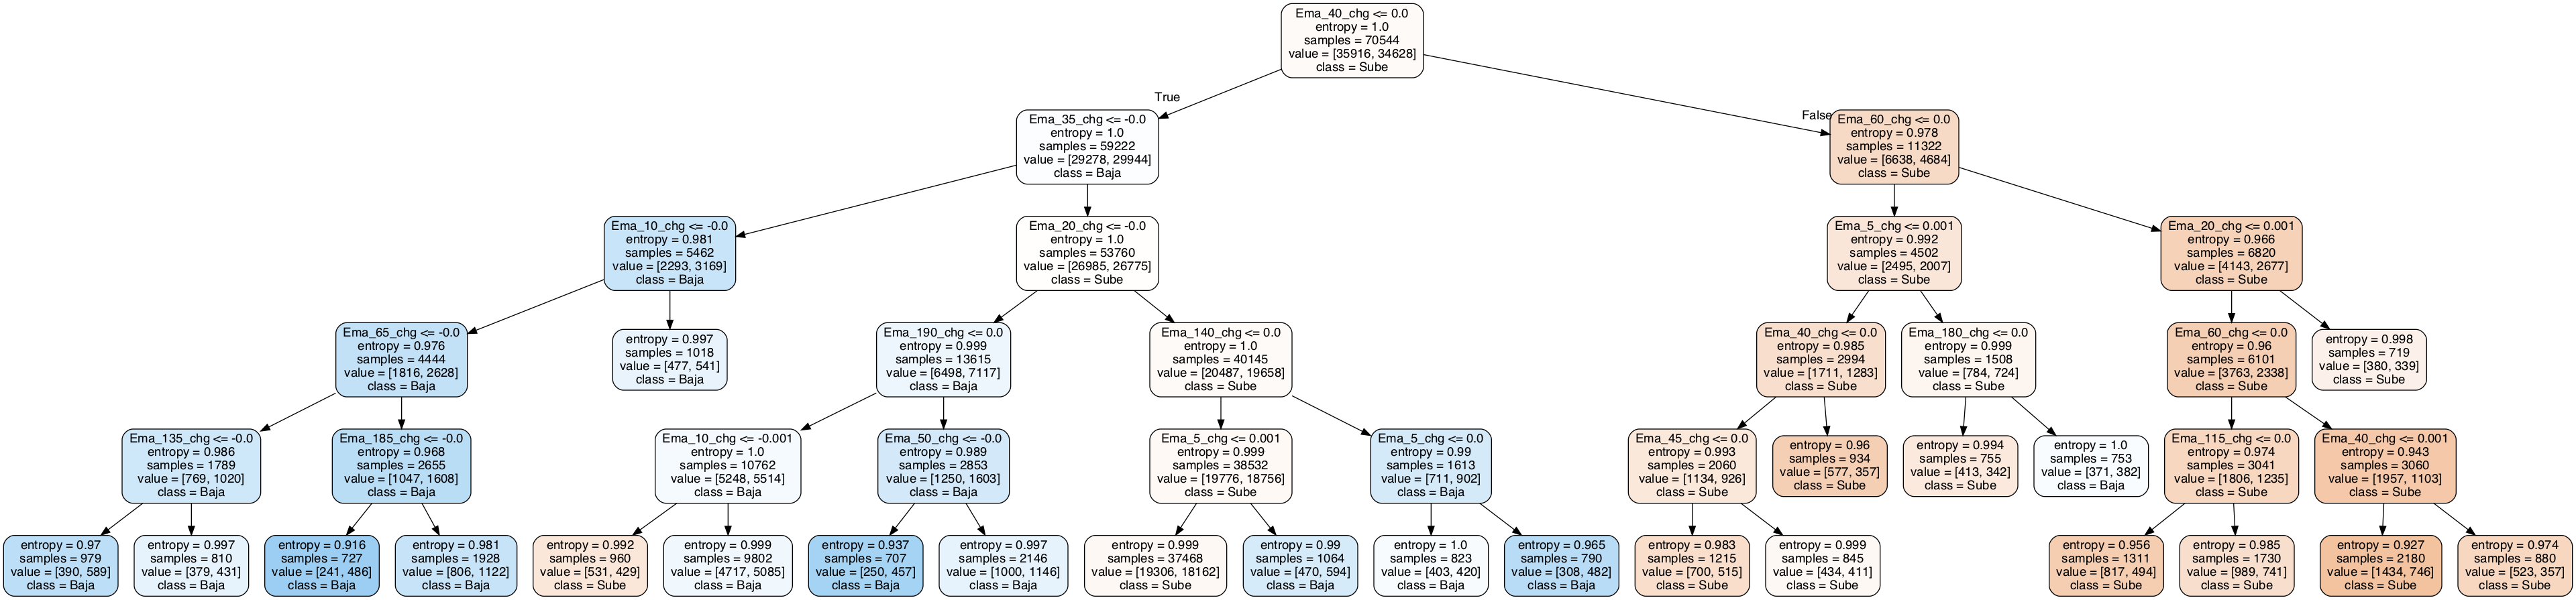

In [656]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Sube','Baja']

dot_data = tree.export_graphviz(model, out_file=None, feature_names=indicators_train.columns, 
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)  

# guardo la imagen en disco
graph.write_png("SMAS.png")

# imprimo en pantalla
Image(graph.create_png())

In [657]:
# Reviso la entropia de los nodos hoja

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
n_node_samples = model.tree_.n_node_samples
impurity = model.tree_.impurity

weighted_entropy = 0

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

for i in range(n_nodes):
    if is_leaves[i]:
        weighted_entropy += impurity[i] * n_node_samples[i] 

print('Entropia promedio:', round(weighted_entropy/n_node_samples[0], 3))

Entropia promedio: 0.992


# 6. Reviso probabilidades de estimacion

In [669]:
r= model.predict_proba(indicators_test)

backtest = pd.DataFrame(data=r, columns=['Down prob', 'Up prob'])
backtest['Actual'] = results_test
backtest['Correct'] = 0
backtest['Predicted'] = 0
prob_threshold = 0.6

backtest.loc[(backtest['Down prob'] > prob_threshold) & (backtest['Actual'] == 0), 'Correct'] = 1
backtest.loc[(backtest['Up prob'] >= prob_threshold) & (backtest['Actual'] == 1), 'Correct'] = 1
backtest.loc[(backtest['Down prob'] >= prob_threshold) | (backtest['Up prob'] >= prob_threshold), 'Predicted'] = 1

print('Accuracy: ', backtest['Correct'].sum()/backtest['Predicted'].sum())
print('Predicted: ', backtest['Predicted'].sum()/len(backtest))
print('Total predictions:', backtest['Predicted'].sum())

Accuracy:  0.599290780141844
Predicted:  0.027976190476190477
Total predictions: 282


array([[<AxesSubplot:title={'center':'Up prob'}>]], dtype=object)

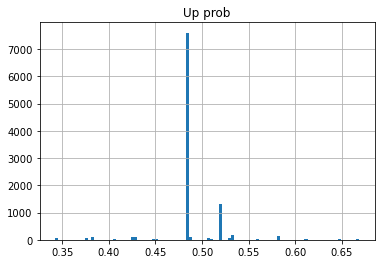

In [663]:
backtest.hist(column='Up prob', bins=100)

# 6. Resultados